<a href="https://colab.research.google.com/github/NisrinaRafifa/Virtual-Internship-Big-Data-Analytics-PT-Kimia-Farma/blob/main/Visualisasi_Data_Analysis_Kimia_Farma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [35]:
df = pd.read_csv('/content/Penjualan.csv', sep = ";")
df

,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Cabang,customer_nama
0,TD,CAB01,IN5997,20/01/22,CUST55380,ACYCLOVIR DUS,1,DUS,1170,IDR,BRND001,OGB & PH,Aceh,APOTEK TAPAK
1,TD,CAB01,IN6297,20/01/22,CUST55381,ALERGINE TABLET SALUT,5,DUS,2338,IDR,BRND002,ETIKAL,Aceh,APOTEK MAJA
2,TA,CAB02,IN6155,21/01/22,CUST55382,AMPICILLIN,9,DUS,10691,IDR,BRND003,MARCKS,Kuningan,KLINIK GM
3,EPM,CAB03,IN6144,22/01/22,CUST55383,TRAMADOL KAPSUL 50 MG,13,DUS,8701,IDR,BRND004,VNS,Jakarta,APOTEK MERDEKA
4,TD,CAB04,IN6280,23/01/22,CUST55384,KLORPROMAZINA TABLET SALUT SELAPUT 100 MG,1,DUS,5648,IDR,BRND005,SLCYL,Bandung,KLINIK SAHABAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,TD,CAB04,IN6312,02/05/22,CUST55725,KETOCONAZOLE TABLET 200 MG,34,DUS,2819,IDR,BRND006,OGB & PH,Bandung,APOTEK TAPAK
346,TA,CAB05,IN6112,03/05/22,CUST55726,ERGOTAMINE COFFEINE,34,DUS,4592,IDR,BRND007,ETIKAL,Tangerang,APOTEK MAJA
347,EPM,CAB06,IN6204,16/06/22,CUST55727,TETRACYCLINE KAPSUL 250 MG,34,DUS,3992,IDR,BRND008,MARCKS,NaN,KLINIK GM
348,TD,CAB07,IN6304,30/04/22,CUST55728,AMBROXOL HC,44,DUS,5781,IDR,BRND009,VNS,NaN,APOTEK MERDEKA


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_distributor  350 non-null    object
 1   id_cabang       350 non-null    object
 2   id_invoice      350 non-null    object
 3   tanggal         350 non-null    object
 4   id_customer     350 non-null    object
 5   id_barang       350 non-null    object
 6   jumlah_barang   350 non-null    int64 
 7   unit            350 non-null    object
 8   harga           350 non-null    int64 
 9   mata_uang       350 non-null    object
 10  brand_id        350 non-null    object
 11  lini            350 non-null    object
 12  Cabang          301 non-null    object
 13  customer_nama   350 non-null    object
dtypes: int64(2), object(12)
memory usage: 38.4+ KB


OUTLIER

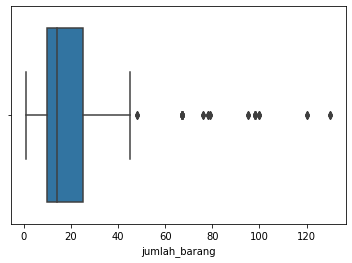

In [38]:
plt.figure()
sns.boxplot(x=df["jumlah_barang"])
plt.show()

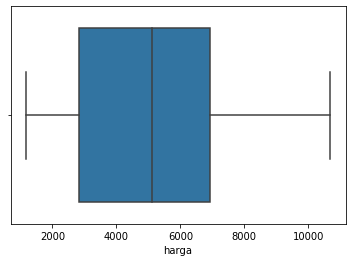

In [39]:
plt.figure()
sns.boxplot(x=df["harga"])
plt.show()

Memasukan format bulan dan tahun ke dalam kolom order_month

In [ ]:
# Buat kolom order_month
df['order_month'] = pd.to_datetime(df['tanggal']).dt.strftime('%m/%y')
df['order_month']

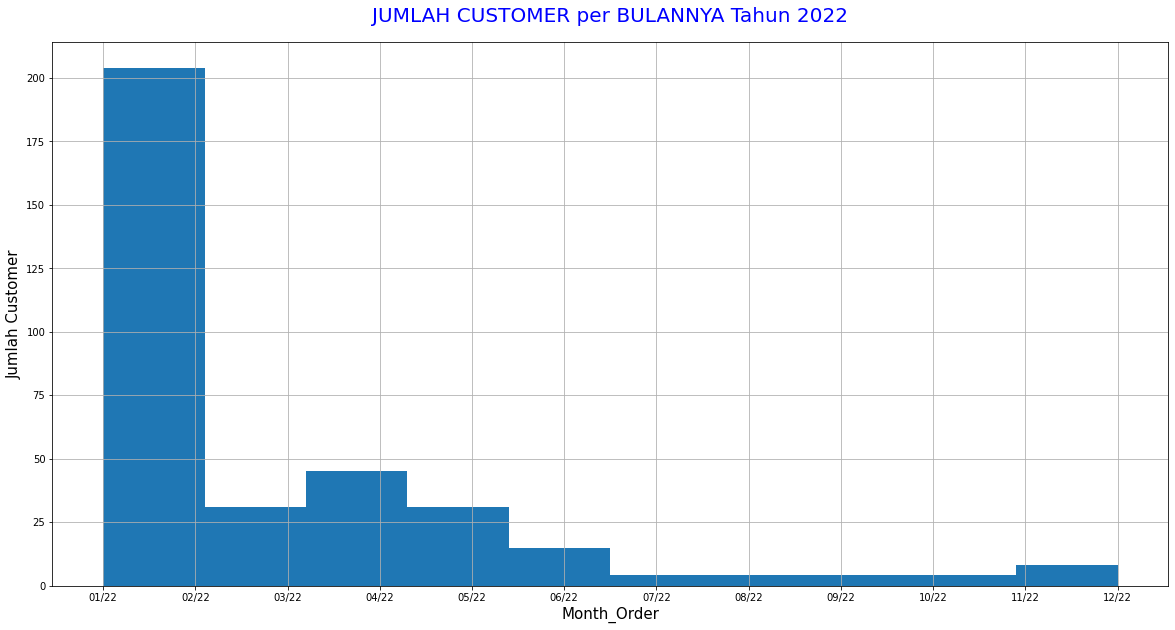

In [167]:
df["order_month"].hist(figsize=(20, 10))
plt.title('JUMLAH CUSTOMER per BULANNYA Tahun 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Month_Order', fontsize=15)
plt.ylabel('Jumlah Customer', fontsize=15)
plt.show()  

Menghitung GMV = total penjualan (harga*jumlah barang)

In [178]:
df['gmv'] = df['harga'] * df['jumlah_barang']
df.sort_values(by='gmv', ascending=False).head(15)

,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Cabang,customer_nama,order_month,gmv,cabang_top,brand_top,lini_top,barang_top
72,TA,CAB01,IN6263,31/01/22,CUST55452,AMPICILLIN,130,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK SINAR JAYA,01/22,1389830,Aceh,BRND003,MARCKS,AMPICILLIN
282,TA,CAB01,IN6316,19/04/22,CUST55662,AMPICILLIN,120,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK SINAR JAYA,04/22,1282920,Aceh,BRND003,MARCKS,AMPICILLIN
92,TD,CAB06,IN6074,27/01/22,CUST55472,AMPICILLIN,98,DUS,10691,IDR,BRND003,MARCKS,Bekasi,KLINIK GM,01/22,1047718,Bekasi,BRND003,MARCKS,AMPICILLIN
62,TA,CAB06,IN6124,27/01/22,CUST55442,AMPICILLIN,95,DUS,10691,IDR,BRND003,MARCKS,Bekasi,KLINIK GM,01/22,1015645,Bekasi,BRND003,MARCKS,AMPICILLIN
169,TD,CAB08,IN6181,07/02/22,CUST55549,PARACETAMOL,130,DUS,6940,IDR,BRND010,SLCYL,Lampung,KLINIK SAHABAT,07/22,902200,other,BRND010,SLCYL,PARACETAMOL
173,TD,CAB01,IN6319,11/02/22,CUST55553,TRAMADOL KAPSUL 50 MG,98,DUS,8701,IDR,BRND004,VNS,Aceh,APOTEK MAJA,11/22,852698,Aceh,BRND004,VNS,TRAMADOL KAPSUL 50 MG
242,EPM,CAB06,IN5983,21/04/22,CUST55622,AMPICILLIN,67,DUS,10691,IDR,BRND003,MARCKS,Bekasi,KLINIK GM,04/22,716297,Bekasi,BRND003,MARCKS,AMPICILLIN
212,EPM,CAB06,IN6290,22/03/22,CUST55592,AMPICILLIN,67,DUS,10691,IDR,BRND003,MARCKS,Bekasi,KLINIK GM,03/22,716297,Bekasi,BRND003,MARCKS,AMPICILLIN
172,TD,CAB01,IN6234,10/02/22,CUST55552,AMPICILLIN,67,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK TAPAK,10/22,716297,Aceh,BRND003,MARCKS,AMPICILLIN
88,TD,CAB02,IN6286,23/01/22,CUST55468,AMPICILLIN,120,DUS,5781,IDR,BRND009,VNS,Kuningan,APOTEK SAHABAT,01/22,693720,Kuningan,BRND009,VNS,AMPICILLIN


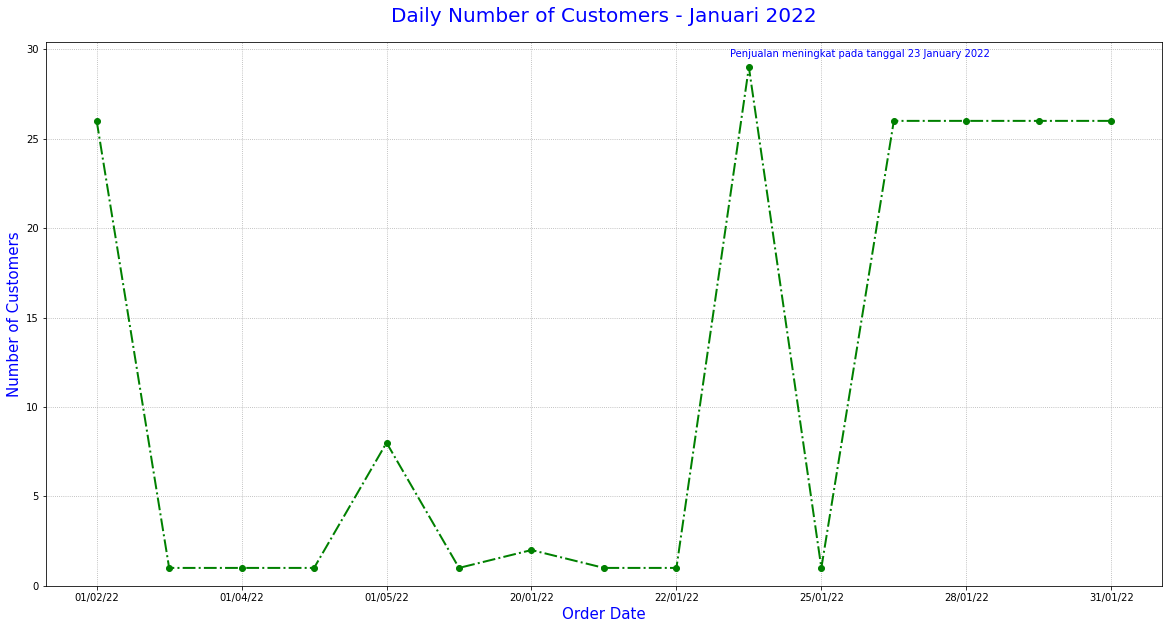

In [187]:
fig=plt.figure(figsize=(20, 10))
df[df['order_month']=='01/22'].groupby(['tanggal'])['id_customer'].nunique().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Daily Number of Customers - Januari 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.8)
plt.ylim(ymin=0)
plt.text(0.6, 0.86,'Penjualan meningkat pada tanggal 23 January 2022', transform=fig.transFigure, color='blue')
plt.show()


In [188]:
df[df['order_month']=='01/22'].groupby(['tanggal'])['id_customer'].nunique()

tanggal
01/02/22      26
01/03/22       1
01/04/22       1
01/05/2022     1
01/05/22       8
01/06/22       1
20/01/22       2
21/01/22       1
22/01/22       1
23/01/22      29
25/01/22       1
27/01/22      26
28/01/22      26
30/01/22      26
31/01/22      26
Name: id_customer, dtype: int64

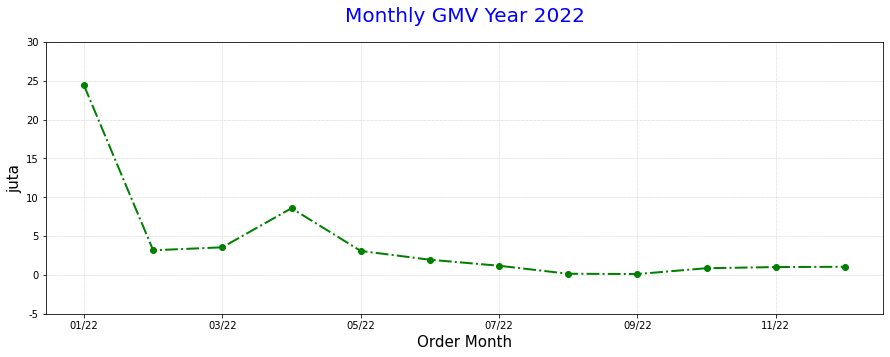

In [48]:
fig=plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('juta', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()


In [189]:
df.groupby(['order_month'])['gmv'].sum()

order_month
01/22    24415543
02/22     3179937
03/22     3560636
04/22     8595967
05/22     3096264
06/22     1963267
07/22     1188551
08/22      156997
09/22      118818
10/22      869683
11/22     1017834
12/22     1053654
Name: gmv, dtype: int64

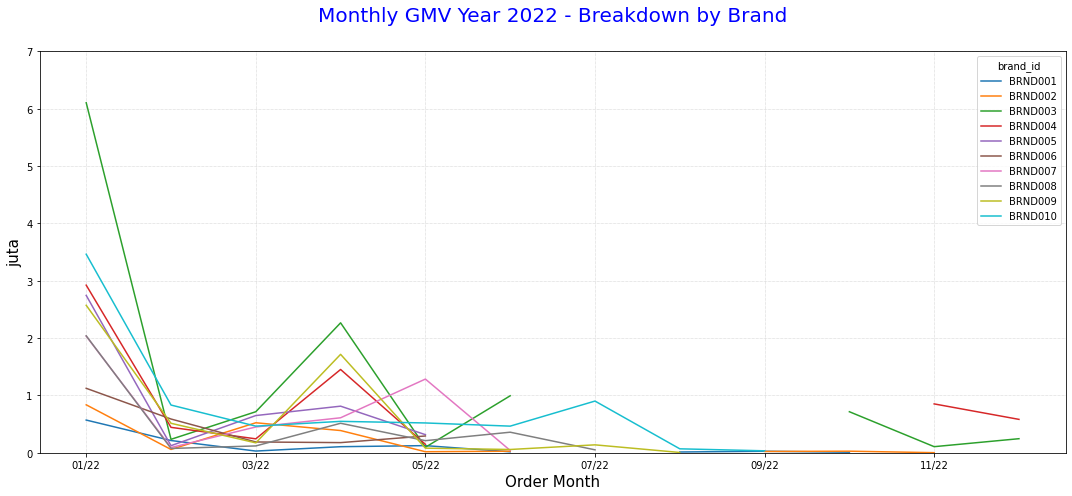

In [49]:
df.groupby(['order_month','brand_id'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2022 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [190]:
df.groupby(['order_month','brand_id'])['gmv'].sum().unstack()

brand_id,BRND001,BRND002,BRND003,BRND004,BRND005,BRND006,BRND007,BRND008,BRND009,BRND010
order_month,,,,,,,,,,
01/22,570960.0,837004.0,6104561.0,2923536.0,2744928.0,1124781.0,2034256.0,2039912.0,2572545.0,3463060.0
02/22,214110.0,58450.0,235202.0,443751.0,124256.0,589171.0,91840.0,75848.0,514509.0,832800.0
03/22,30420.0,523712.0,716297.0,243628.0,649520.0,188873.0,450016.0,119760.0,173430.0,464980.0
04/22,106470.0,388108.0,2266492.0,1453067.0,813312.0,177597.0,610736.0,514968.0,1716957.0,548260.0
05/22,125190.0,18704.0,96219.0,147917.0,316288.0,293176.0,1285760.0,211576.0,80934.0,520500.0
06/22,17550.0,28056.0,994263.0,NaN,NaN,NaN,41328.0,359280.0,57810.0,464980.0
07/22,NaN,NaN,NaN,95711.0,NaN,NaN,NaN,51896.0,138744.0,902200.0
08/22,14040.0,NaN,NaN,NaN,67776.0,NaN,NaN,NaN,5781.0,69400.0
09/22,26910.0,23380.0,NaN,NaN,NaN,33828.0,NaN,NaN,NaN,34700.0


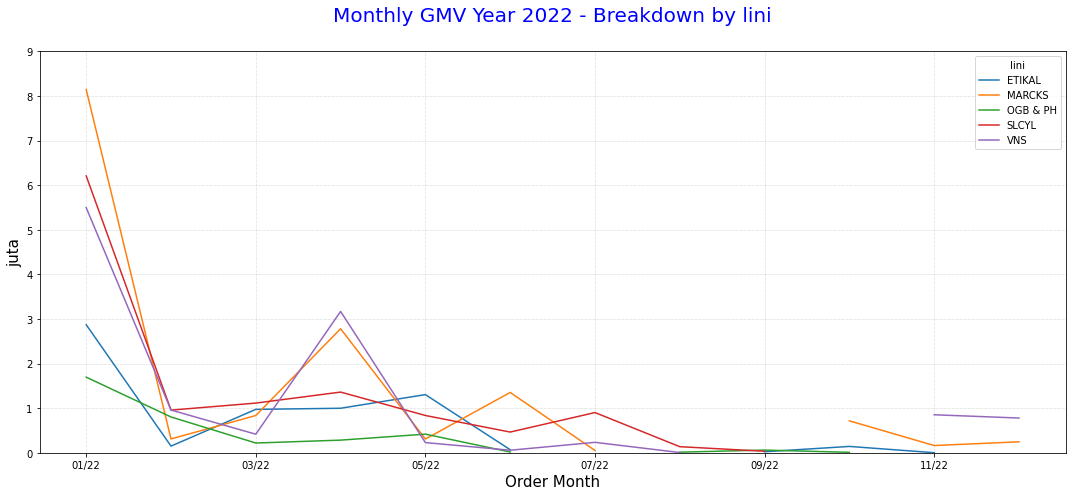

In [51]:
df.groupby(['order_month','lini'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2022 - Breakdown by lini',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [191]:
df.groupby(['order_month','lini'])['gmv'].sum().unstack()

lini,ETIKAL,MARCKS,OGB & PH,SLCYL,VNS
order_month,,,,,
01/22,2871260.0,8144473.0,1695741.0,6207988.0,5496081.0
02/22,150290.0,311050.0,803281.0,957056.0,958260.0
03/22,973728.0,836057.0,219293.0,1114500.0,417058.0
04/22,998844.0,2781460.0,284067.0,1361572.0,3170024.0
05/22,1304464.0,307795.0,418366.0,836788.0,228851.0
06/22,69384.0,1353543.0,17550.0,464980.0,57810.0
07/22,NaN,51896.0,NaN,902200.0,234455.0
08/22,NaN,NaN,14040.0,137176.0,5781.0
09/22,23380.0,NaN,60738.0,34700.0,NaN


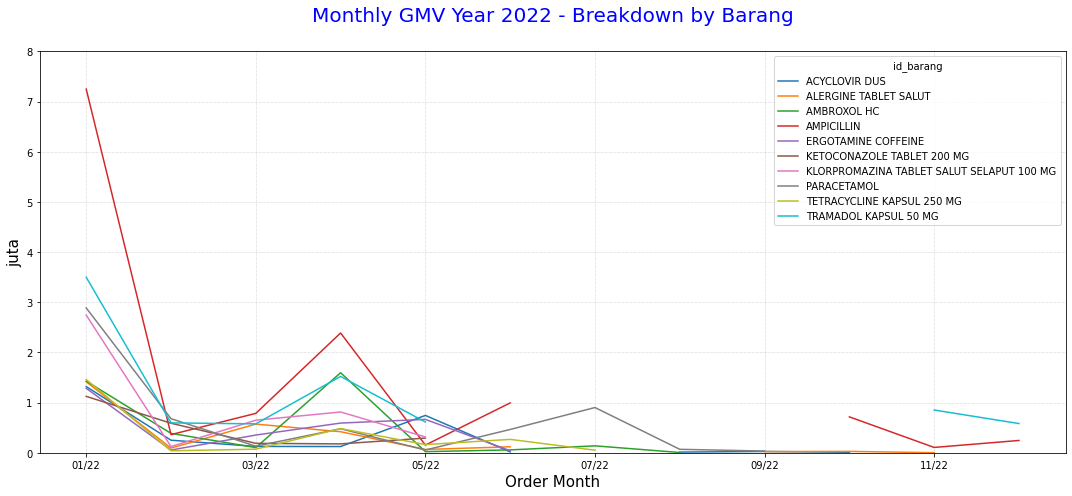

In [53]:
df.groupby(['order_month','id_barang'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2022 - Breakdown by Barang',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [192]:
df.groupby(['order_month','id_barang'])['gmv'].sum().unstack()

id_barang,ACYCLOVIR DUS,ALERGINE TABLET SALUT,AMBROXOL HC,AMPICILLIN,ERGOTAMINE COFFEINE,KETOCONAZOLE TABLET 200 MG,KLORPROMAZINA TABLET SALUT SELAPUT 100 MG,PARACETAMOL,TETRACYCLINE KAPSUL 250 MG,TRAMADOL KAPSUL 50 MG
order_month,,,,,,,,,,
01/22,1319456.0,1415844.0,1427907.0,7249199.0,1285760.0,1124781.0,2744928.0,2887040.0,1461072.0,3499556.0
02/22,250846.0,94378.0,387327.0,362384.0,55104.0,589171.0,124256.0,680120.0,39920.0,596431.0
03/22,126852.0,571616.0,104058.0,785669.0,353584.0,188873.0,649520.0,131860.0,71856.0,576748.0
04/22,124838.0,420044.0,1595556.0,2387893.0,592368.0,177597.0,813312.0,478860.0,483032.0,1522467.0
05/22,745110.0,66608.0,23124.0,154029.0,665840.0,293176.0,316288.0,55520.0,163672.0,612897.0
06/22,17550.0,119872.0,57810.0,994263.0,41328.0,NaN,NaN,464980.0,267464.0,NaN
07/22,NaN,NaN,138744.0,NaN,NaN,NaN,NaN,902200.0,51896.0,95711.0
08/22,14040.0,NaN,5781.0,NaN,NaN,NaN,67776.0,69400.0,NaN,NaN
09/22,26910.0,23380.0,NaN,NaN,NaN,33828.0,NaN,34700.0,NaN,NaN


In [57]:
# Buat variabel untuk 5 brand dengan GMV tertinggi Tahun 2022
top_brands = (df.groupby('brand_id')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_brands)


  brand_id       gmv
2  BRND003  11482134
9  BRND010   7300880
3  BRND004   6743275
8  BRND009   5457264
4  BRND005   4744320


In [58]:
# Buat variabel untuk 5 lini dengan GMV tertinggi Tahun 2022
top_lini = (df.groupby('lini')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_lini)


       lini       gmv
1    MARCKS  14911262
4       VNS  12200539
3     SLCYL  12045200
0    ETIKAL   6536544
2  OGB & PH   3523606


In [59]:
# Buat variabel untuk 5 barang dengan GMV tertinggi Tahun 2022
top_barang = (df.groupby('id_barang')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_barang)


                                   id_barang       gmv
3                                 AMPICILLIN  13002537
9                      TRAMADOL KAPSUL 50 MG   8339475
7                                PARACETAMOL   5704680
6  KLORPROMAZINA TABLET SALUT SELAPUT 100 MG   4744320
2                                AMBROXOL HC   3936861


In [60]:
# Buat variabel untuk 5 cabang dengan GMV tertinggi Tahun 2022
top_cabang = (df.groupby('Cabang')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_cabang)


     Cabang       gmv
0      Aceh  15195029
4  Kuningan   8683666
2    Bekasi   6327759
3   Jakarta   4212389
6    Padang   4021405


In [61]:
# Buat satu kolom lagi di dataset dengan nama cabang_top
df['cabang_top'] = df['Cabang'].apply(lambda x: x if (x in top_cabang['Cabang'].to_list()) else 'other')


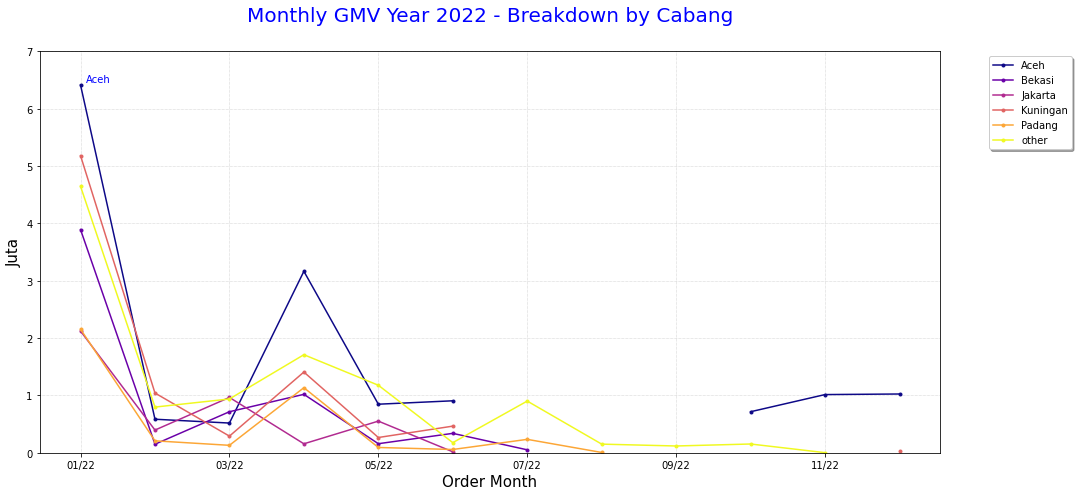

In [91]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','cabang_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by Cabang',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.text(0.08, 1.15,'Aceh', transform=fig.transFigure, color='blue')
plt.show()

In [193]:
df.groupby(['order_month','cabang_top'])['gmv'].sum()

order_month  cabang_top
01/22        Aceh          6414391
             Bekasi        3892677
             Jakarta       2123338
             Kuningan      5182323
             Padang        2155793
             other         4647021
02/22        Aceh           585439
             Bekasi         149674
             Jakarta        396498
             Kuningan      1042229
             Padang         208824
             other          797273
03/22        Aceh           518714
             Bekasi         716297
             Jakarta        965531
             Kuningan       290837
             Padang         130515
             other          938742
04/22        Aceh          3164909
             Bekasi        1019689
             Jakarta        157003
             Kuningan      1408271
             Padang        1135495
             other         1710600
05/22        Aceh           847492
             Bekasi         158532
             Jakarta        552469
             Kuningan       266

In [194]:
# Buat satu kolom lagi di dataset dengan nama Brand_top
df['brand_top'] = df['brand_id'].apply(lambda x: x if (x in top_brands['brand_id'].to_list()) else 'other')


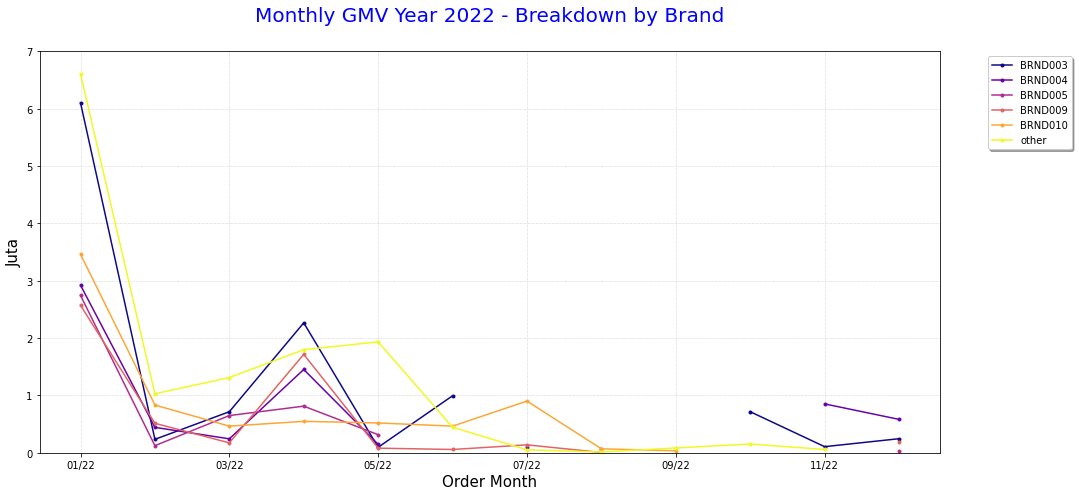

In [66]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','brand_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [195]:
df.groupby(['order_month','brand_top'])['gmv'].sum()

order_month  brand_top
01/22        BRND003      6104561
             BRND004      2923536
             BRND005      2744928
             BRND009      2572545
             BRND010      3463060
             other        6606913
02/22        BRND003       235202
             BRND004       443751
             BRND005       124256
             BRND009       514509
             BRND010       832800
             other        1029419
03/22        BRND003       716297
             BRND004       243628
             BRND005       649520
             BRND009       173430
             BRND010       464980
             other        1312781
04/22        BRND003      2266492
             BRND004      1453067
             BRND005       813312
             BRND009      1716957
             BRND010       548260
             other        1797879
05/22        BRND003        96219
             BRND004       147917
             BRND005       316288
             BRND009        80934
             BRND010     

In [65]:
# Buat satu kolom lagi di dataset dengan nama lini_top
df['lini_top'] = df['lini'].apply(lambda x: x if (x in top_lini['lini'].to_list()) else 'other')


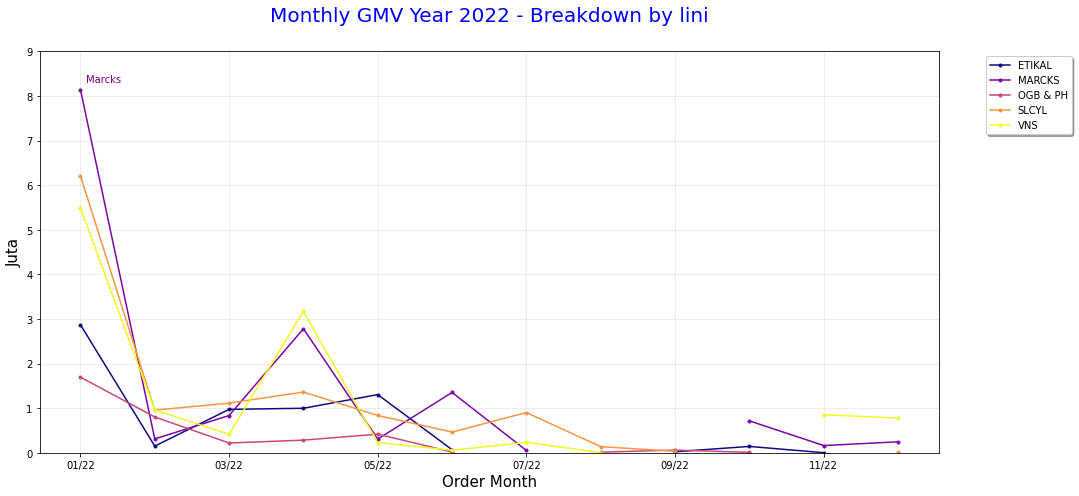

In [95]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','lini_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by lini',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.text(0.08, 1.15,'Marcks', transform=fig.transFigure, color='purple')
plt.show()


In [196]:
df.groupby(['order_month','lini_top'])['gmv'].sum().unstack()

lini_top,ETIKAL,MARCKS,OGB & PH,SLCYL,VNS
order_month,,,,,
01/22,2871260.0,8144473.0,1695741.0,6207988.0,5496081.0
02/22,150290.0,311050.0,803281.0,957056.0,958260.0
03/22,973728.0,836057.0,219293.0,1114500.0,417058.0
04/22,998844.0,2781460.0,284067.0,1361572.0,3170024.0
05/22,1304464.0,307795.0,418366.0,836788.0,228851.0
06/22,69384.0,1353543.0,17550.0,464980.0,57810.0
07/22,NaN,51896.0,NaN,902200.0,234455.0
08/22,NaN,NaN,14040.0,137176.0,5781.0
09/22,23380.0,NaN,60738.0,34700.0,NaN


In [ ]:
# Buat satu kolom lagi di dataset dengan nama lini_top
df['barang_top'] = df['id_barang'].apply(lambda x: x if (x in top_barang['id_barang'].to_list()) else 'other')
df['barang_top']

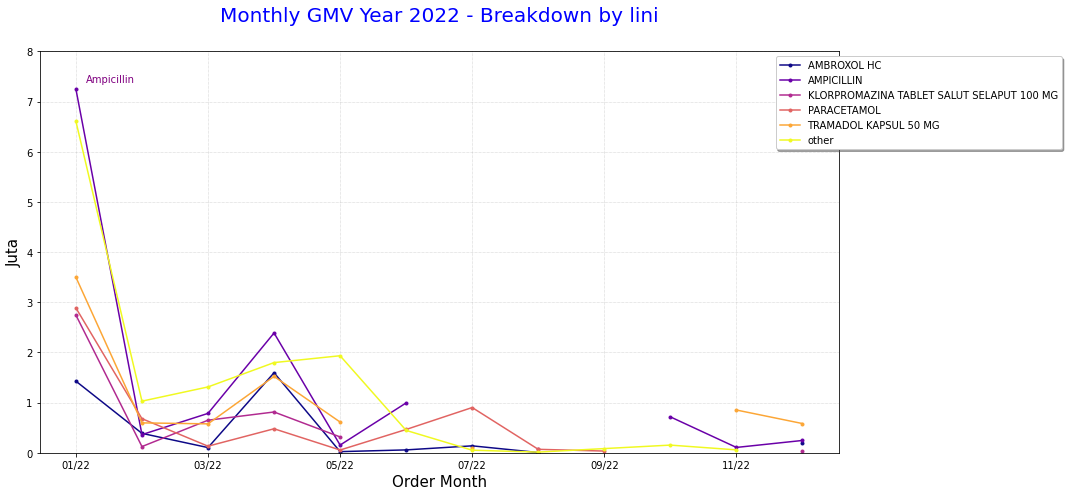

In [94]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','barang_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by lini',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Juta',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.text(0.08, 1.15,'Ampicillin', transform=fig.transFigure, color='purple')
plt.show()


In [197]:
df.groupby(['order_month','barang_top'])['gmv'].sum().unstack()

barang_top,AMBROXOL HC,AMPICILLIN,KLORPROMAZINA TABLET SALUT SELAPUT 100 MG,PARACETAMOL,TRAMADOL KAPSUL 50 MG,other
order_month,,,,,,
01/22,1427907.0,7249199.0,2744928.0,2887040.0,3499556.0,6606913.0
02/22,387327.0,362384.0,124256.0,680120.0,596431.0,1029419.0
03/22,104058.0,785669.0,649520.0,131860.0,576748.0,1312781.0
04/22,1595556.0,2387893.0,813312.0,478860.0,1522467.0,1797879.0
05/22,23124.0,154029.0,316288.0,55520.0,612897.0,1934406.0
06/22,57810.0,994263.0,NaN,464980.0,NaN,446214.0
07/22,138744.0,NaN,NaN,902200.0,95711.0,51896.0
08/22,5781.0,NaN,67776.0,69400.0,NaN,14040.0
09/22,NaN,NaN,NaN,34700.0,NaN,84118.0


Karena Cabang Aceh dan Bulan Januari memiliki GMV dan costumer terbanyak maka, analisis di persempit lagi untuk menganalisis khusus di cabang aceh pada bulan januari

In [199]:
df_cab01 = df[(df['id_cabang']=='CAB01') & (df['order_month'] == '01/22')]
df_cab01.head()

,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Cabang,customer_nama,order_month,gmv,cabang_top,brand_top,lini_top,barang_top
0,TD,CAB01,IN5997,20/01/22,CUST55380,ACYCLOVIR DUS,1,DUS,1170,IDR,BRND001,OGB & PH,Aceh,APOTEK TAPAK,01/22,1170,Aceh,other,OGB & PH,other
1,TD,CAB01,IN6297,20/01/22,CUST55381,ALERGINE TABLET SALUT,5,DUS,2338,IDR,BRND002,ETIKAL,Aceh,APOTEK MAJA,01/22,11690,Aceh,other,ETIKAL,other
11,TD,CAB01,IN6287,30/01/22,CUST55391,ALERGINE TABLET SALUT,17,DUS,2338,IDR,BRND002,ETIKAL,Aceh,KLINIK SAHABAT,01/22,39746,Aceh,other,ETIKAL,other
12,TA,CAB01,IN6102,31/01/22,CUST55392,AMPICILLIN,11,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK SINAR JAYA,01/22,117601,Aceh,BRND003,MARCKS,AMPICILLIN
22,TA,CAB01,IN6125,23/01/22,CUST55402,AMPICILLIN,14,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK TAPAK,01/22,149674,Aceh,BRND003,MARCKS,AMPICILLIN


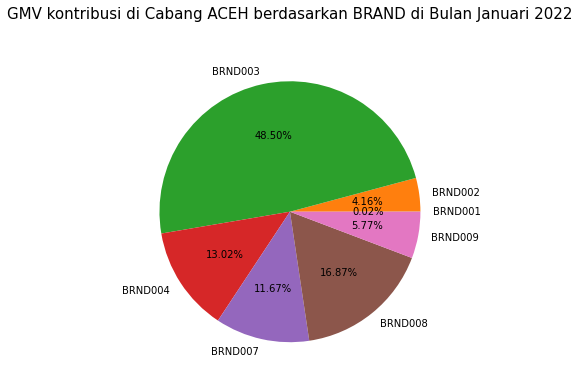

In [135]:
gmv_df_cab01_bybrand = df_cab01.groupby('brand_id')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_df_cab01_bybrand['gmv'], labels = gmv_df_cab01_bybrand['brand_id'], autopct='%1.2f%%')
plt.title('GMV kontribusi di Cabang ACEH berdasarkan BRAND di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='black')
plt.show()


In [204]:
df_cab01.groupby('brand_id')['gmv'].sum().reset_index().sort_values(by='gmv', ascending=False)

,brand_id,gmv
2,BRND003,3111081
5,BRND008,1081832
3,BRND004,835296
4,BRND007,748496
6,BRND009,369984
1,BRND002,266532
0,BRND001,1170


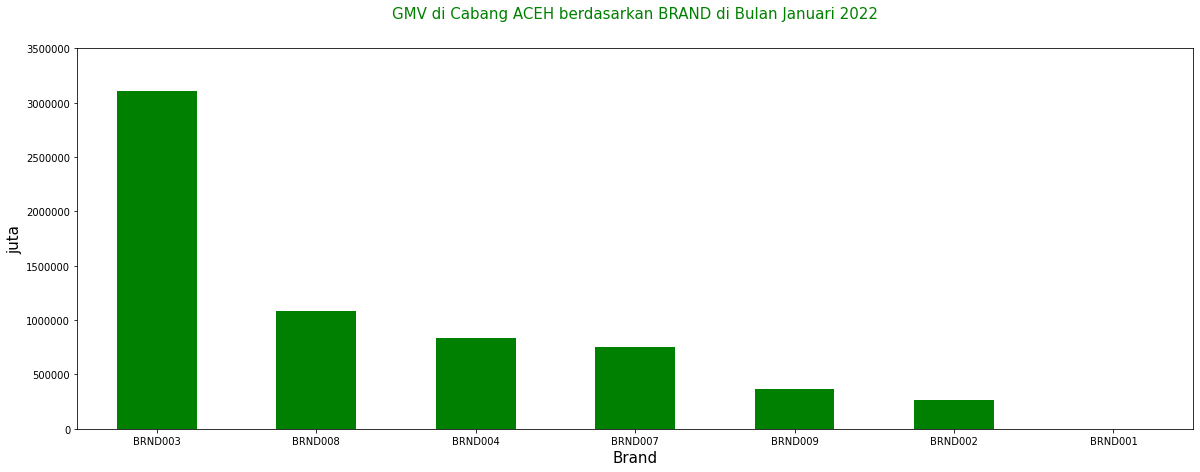

In [137]:
plt.clf()
gmv_df_cab01_bybrand.groupby('brand_id')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV di Cabang ACEH berdasarkan BRAND di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='GREEN')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=0)
plt.gcf().set_size_inches(20, 7)
plt.show()


In [109]:
print(gmv_df_cab01_bybrand.sort_values(by='gmv', ascending=False))

  brand_id      gmv
2  BRND003  3111081
5  BRND008  1081832
3  BRND004   835296
4  BRND007   748496
6  BRND009   369984
1  BRND002   266532
0  BRND001     1170


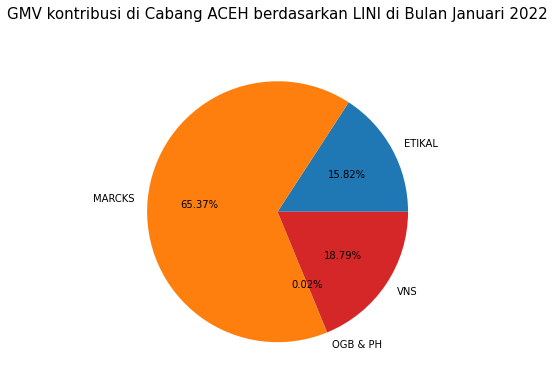

In [139]:
gmv_df_cab01_bylini = df_cab01.groupby('lini')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_df_cab01_bylini['gmv'], labels = gmv_df_cab01_bylini['lini'], autopct='%1.2f%%')
plt.title('GMV kontribusi di Cabang ACEH berdasarkan LINI di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='black')
plt.show()


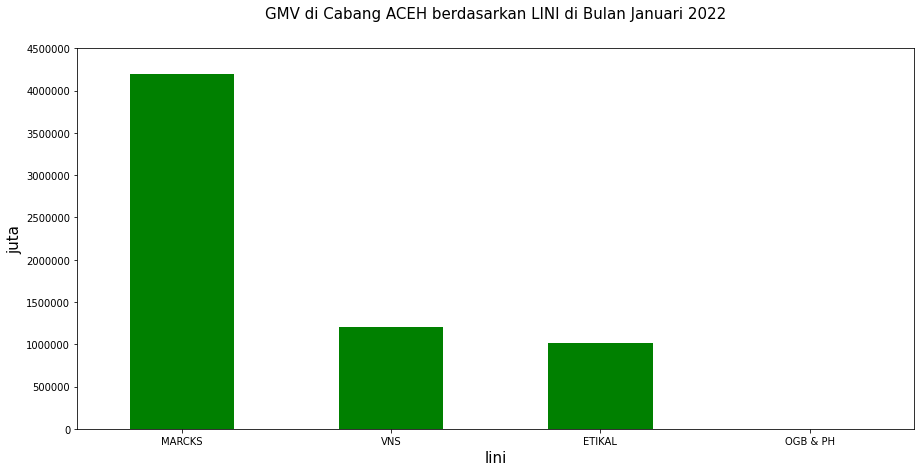

In [140]:
plt.clf()
gmv_df_cab01_bylini.groupby('lini')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV di Cabang ACEH berdasarkan LINI di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='BLACK')
plt.xlabel('lini', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=0)
plt.gcf().set_size_inches(15, 7)
plt.show()


In [111]:
print(gmv_df_cab01_bylini.sort_values(by='gmv', ascending=False))

       lini      gmv
1    MARCKS  4192913
3       VNS  1205280
0    ETIKAL  1015028
2  OGB & PH     1170


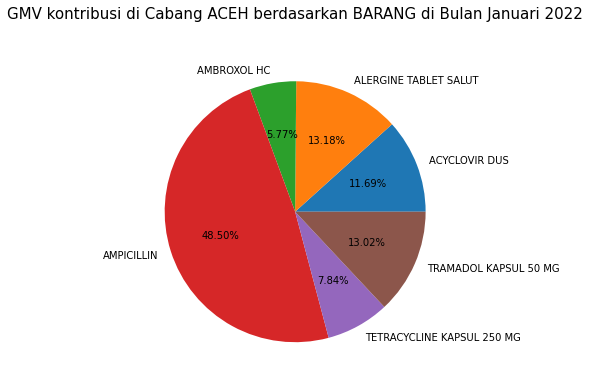

In [143]:
gmv_df_cab01_bybarang = df_cab01.groupby('id_barang')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_df_cab01_bybarang['gmv'], labels = gmv_df_cab01_bybarang['id_barang'], autopct='%1.2f%%')
plt.title('GMV kontribusi di Cabang ACEH berdasarkan BARANG di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='black')
plt.show()


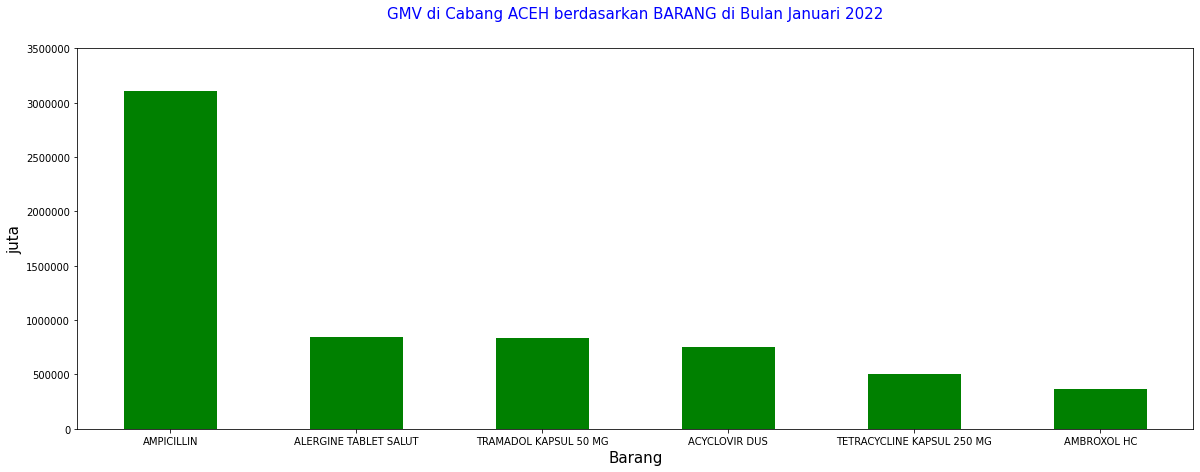

In [144]:
plt.clf()
gmv_df_cab01_bybarang.groupby('id_barang')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV di Cabang ACEH berdasarkan BARANG di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Barang', fontsize = 15)
plt.ylabel('juta',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=0)
plt.gcf().set_size_inches(20, 7)
plt.show()


In [113]:
print(gmv_df_cab01_bybarang.sort_values(by='gmv', ascending=False))

                    id_barang      gmv
3                  AMPICILLIN  3111081
1       ALERGINE TABLET SALUT   845372
5       TRAMADOL KAPSUL 50 MG   835296
0               ACYCLOVIR DUS   749666
4  TETRACYCLINE KAPSUL 250 MG   502992
2                 AMBROXOL HC   369984


Analisis di cabang aceh pada tahun 2022

In [ ]:
df_cab01_semuabulan = df[(df['id_cabang']=='CAB01')]
print(df_cab01_semuabulan.head())

In [163]:
gmv_df_cab01_bybrand_semuabulan = df_cab01_semuabulan.groupby('brand_id')['gmv'].sum().reset_index()

In [164]:
print(gmv_df_cab01_bybrand_semuabulan.sort_values(by='gmv', ascending=False))

  brand_id      gmv
2  BRND003  6628420
3  BRND004  2723413
6  BRND009  1977102
5  BRND008  1760472
4  BRND007  1519952
1  BRND002   584500
0  BRND001     1170


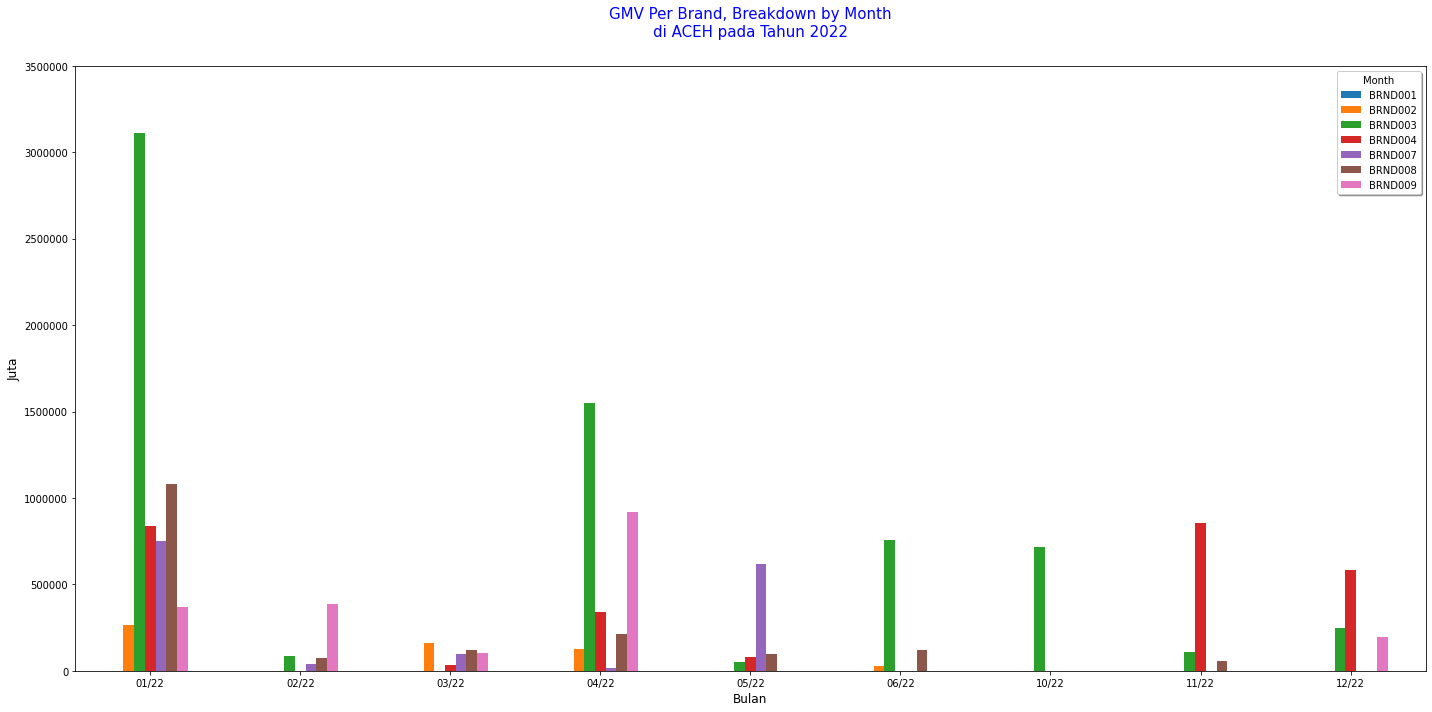

In [207]:
df_cab01_semuabulan.groupby(['order_month','brand_id'])['gmv'].sum().unstack().plot(kind= 'bar')
plt.title('GMV Per Brand, Breakdown by Month\ndi ACEH pada Tahun 2022',loc= 'center',pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan',fontsize = 12)
plt.ylabel('Juta',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=0)
plt.gcf().set_size_inches(20, 10)
plt. tight_layout()
plt.show()


In [206]:
df_cab01_semuabulan.groupby(['order_month','brand_id'])['gmv'].sum().unstack()

brand_id,BRND001,BRND002,BRND003,BRND004,BRND007,BRND008,BRND009
order_month,,,,,,,
01/22,1170.0,266532.0,3111081.0,835296.0,748496.0,1081832.0,369984.0
02/22,NaN,NaN,85528.0,NaN,36736.0,75848.0,387327.0
03/22,NaN,163660.0,NaN,34804.0,96432.0,119760.0,104058.0
04/22,NaN,126252.0,1550195.0,339339.0,18368.0,211576.0,919179.0
05/22,NaN,NaN,53455.0,78309.0,619920.0,95808.0,NaN
06/22,NaN,28056.0,759061.0,NaN,NaN,119760.0,NaN
10/22,NaN,NaN,716297.0,NaN,NaN,NaN,NaN
11/22,NaN,NaN,106910.0,852698.0,NaN,55888.0,NaN
12/22,NaN,NaN,245893.0,582967.0,NaN,NaN,196554.0


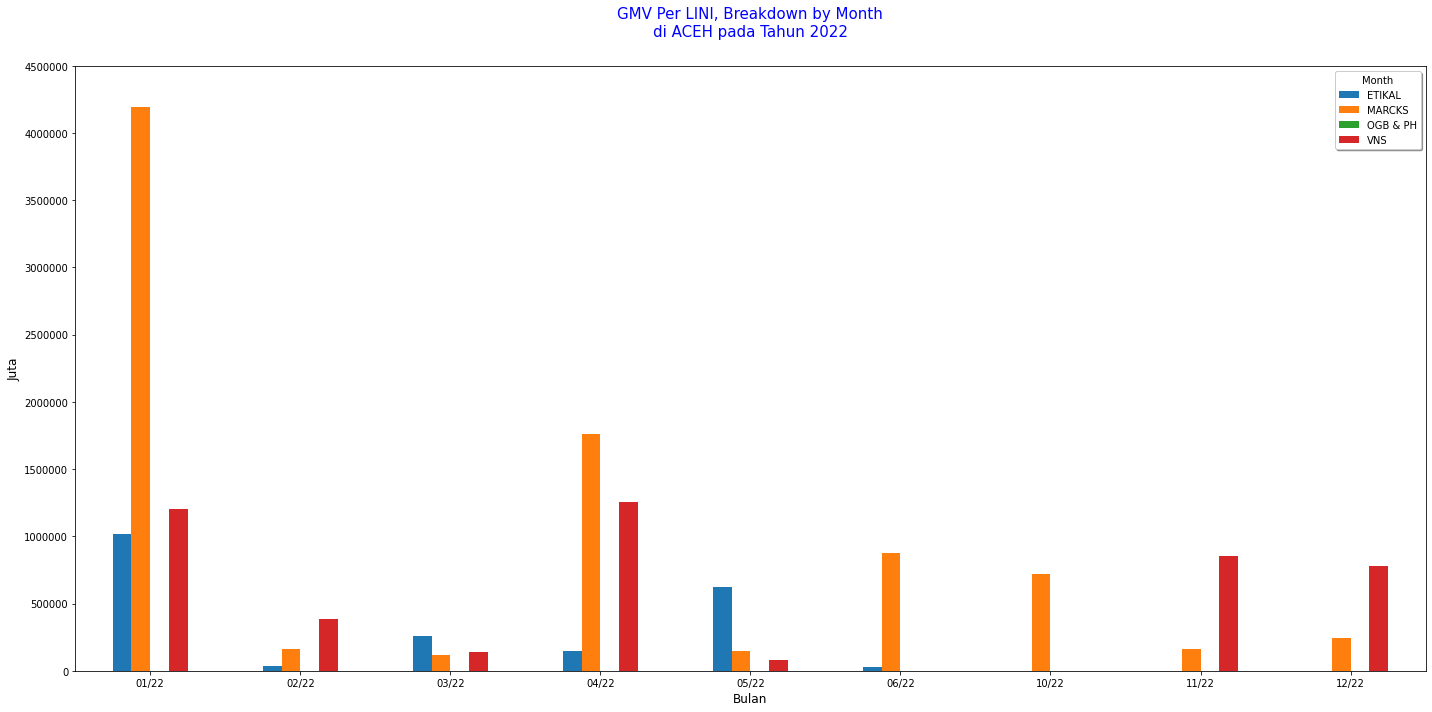

In [209]:
df_cab01_semuabulan.groupby(['order_month','lini'])['gmv'].sum().unstack().plot(kind= 'bar')
plt.title('GMV Per LINI, Breakdown by Month\ndi ACEH pada Tahun 2022',loc= 'center',pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan',fontsize = 12)
plt.ylabel('Juta',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=0)
plt.gcf().set_size_inches(20, 10)
plt. tight_layout()
plt.show()


In [208]:
df_cab01_semuabulan.groupby(['order_month','lini'])['gmv'].sum().unstack()

lini,ETIKAL,MARCKS,OGB & PH,VNS
order_month,,,,
01/22,1015028.0,4192913.0,1170.0,1205280.0
02/22,36736.0,161376.0,NaN,387327.0
03/22,260092.0,119760.0,NaN,138862.0
04/22,144620.0,1761771.0,NaN,1258518.0
05/22,619920.0,149263.0,NaN,78309.0
06/22,28056.0,878821.0,NaN,NaN
10/22,NaN,716297.0,NaN,NaN
11/22,NaN,162798.0,NaN,852698.0
12/22,NaN,245893.0,NaN,779521.0


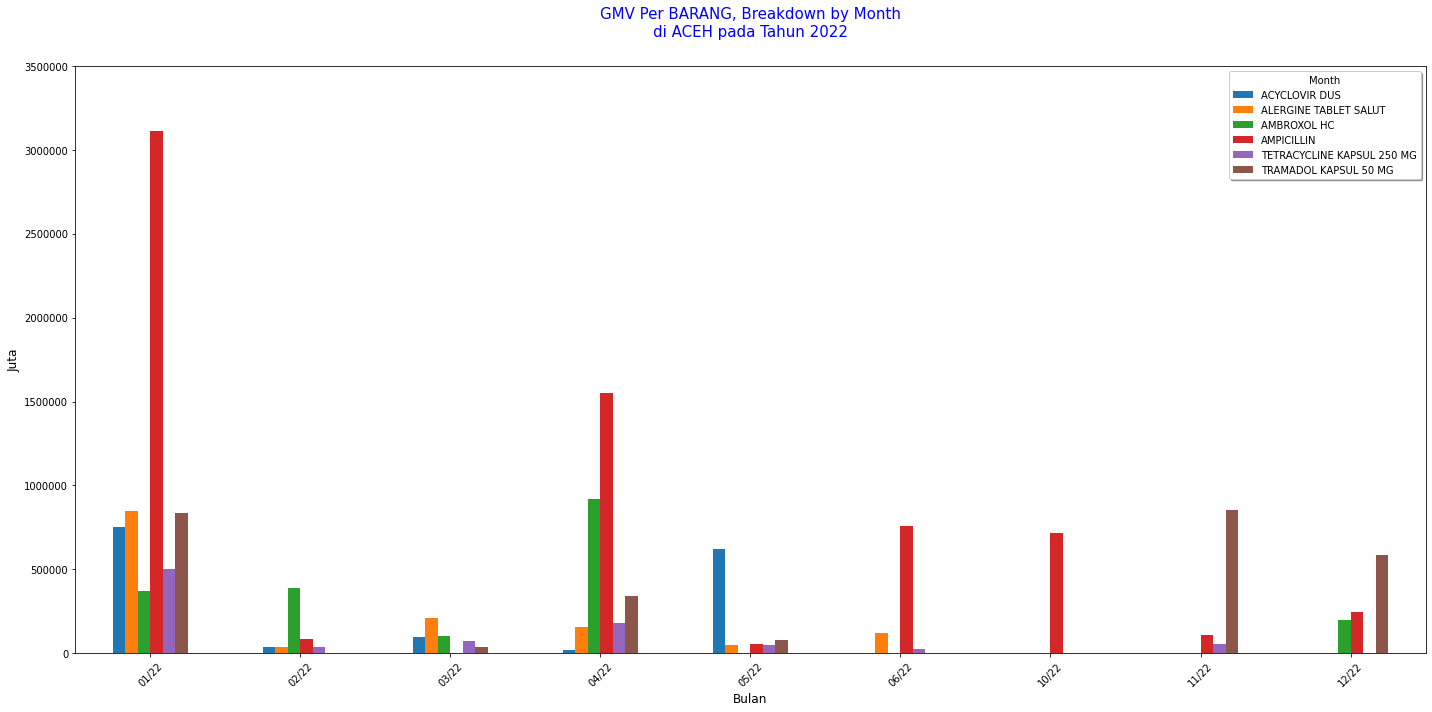

In [152]:
df_cab01_semuabulan.groupby(['order_month','id_barang'])['gmv'].sum().unstack().plot(kind= 'bar')
plt.title('GMV Per BARANG, Breakdown by Month\ndi ACEH pada Tahun 2022',loc= 'center',pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan',fontsize = 12)
plt.ylabel('Juta',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int))
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20, 10)
plt. tight_layout()
plt.show()


In [210]:
df_cab01_semuabulan.groupby(['order_month','id_barang'])['gmv'].sum().unstack()

id_barang,ACYCLOVIR DUS,ALERGINE TABLET SALUT,AMBROXOL HC,AMPICILLIN,TETRACYCLINE KAPSUL 250 MG,TRAMADOL KAPSUL 50 MG
order_month,,,,,,
01/22,749666.0,845372.0,369984.0,3111081.0,502992.0,835296.0
02/22,36736.0,35928.0,387327.0,85528.0,39920.0,NaN
03/22,96432.0,211564.0,104058.0,NaN,71856.0,34804.0
04/22,18368.0,158188.0,919179.0,1550195.0,179640.0,339339.0
05/22,619920.0,47904.0,NaN,53455.0,47904.0,78309.0
06/22,NaN,119872.0,NaN,759061.0,27944.0,NaN
10/22,NaN,NaN,NaN,716297.0,NaN,NaN
11/22,NaN,NaN,NaN,106910.0,55888.0,852698.0
12/22,NaN,NaN,196554.0,245893.0,NaN,582967.0


In [211]:
df_cab01


,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Cabang,customer_nama,order_month,gmv,cabang_top,brand_top,lini_top,barang_top
0,TD,CAB01,IN5997,20/01/22,CUST55380,ACYCLOVIR DUS,1,DUS,1170,IDR,BRND001,OGB & PH,Aceh,APOTEK TAPAK,01/22,1170,Aceh,other,OGB & PH,other
1,TD,CAB01,IN6297,20/01/22,CUST55381,ALERGINE TABLET SALUT,5,DUS,2338,IDR,BRND002,ETIKAL,Aceh,APOTEK MAJA,01/22,11690,Aceh,other,ETIKAL,other
11,TD,CAB01,IN6287,30/01/22,CUST55391,ALERGINE TABLET SALUT,17,DUS,2338,IDR,BRND002,ETIKAL,Aceh,KLINIK SAHABAT,01/22,39746,Aceh,other,ETIKAL,other
12,TA,CAB01,IN6102,31/01/22,CUST55392,AMPICILLIN,11,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK SINAR JAYA,01/22,117601,Aceh,BRND003,MARCKS,AMPICILLIN
22,TA,CAB01,IN6125,23/01/22,CUST55402,AMPICILLIN,14,DUS,10691,IDR,BRND003,MARCKS,Aceh,APOTEK TAPAK,01/22,149674,Aceh,BRND003,MARCKS,AMPICILLIN
23,EPM,CAB01,IN6176,30/01/22,CUST55403,TRAMADOL KAPSUL 50 MG,18,DUS,8701,IDR,BRND004,VNS,Aceh,APOTEK MAJA,01/22,156618,Aceh,BRND004,VNS,TRAMADOL KAPSUL 50 MG
26,EPM,CAB01,IN6173,27/01/22,CUST55406,ACYCLOVIR DUS,12,DUS,4592,IDR,BRND007,ETIKAL,Aceh,KLINIK SAHABAT,01/22,55104,Aceh,other,ETIKAL,other
27,TD,CAB01,IN6013,28/01/22,CUST55407,ALERGINE TABLET SALUT,25,DUS,3992,IDR,BRND008,MARCKS,Aceh,APOTEK SINAR JAYA,01/22,99800,Aceh,other,MARCKS,other
37,TD,CAB01,IN6063,01/02/22,CUST55417,TETRACYCLINE KAPSUL 250 MG,12,DUS,3992,IDR,BRND008,MARCKS,Aceh,APOTEK TAPAK,01/22,47904,Aceh,other,MARCKS,other
38,TD,CAB01,IN6131,27/01/22,CUST55418,AMBROXOL HC,10,DUS,5781,IDR,BRND009,VNS,Aceh,APOTEK MAJA,01/22,57810,Aceh,BRND009,VNS,AMBROXOL HC


#Agregat data per customer yaitu jumlah orders (banyaknya unique order_id) , total quantity, dan total GMV.
#Lalu didapatkan 4 customers yang bertransaksi di ACEH pada Bulan Januari 2022.
#Jika diurutkan dari jumlah gmv terbanyak, bisa dilihat bahwa APOTEK SINAR JAYA 
#telah melakukan 14 kali transaksi dengan jumlah quantity mencapai 345 barang, 
#dan GMV lebih dari 2 juta 7 ratus ribu rupiah Luar biasa ya. 
#Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk. 

In [212]:
data_per_customer = (df_cab01.groupby('customer_nama')
                                   .agg({'id_invoice':'nunique', 
                                         'jumlah_barang': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'id_invoice':'orders'}))
print(data_per_customer.sort_values(by='gmv',ascending=False))
print(data_per_customer.count())

       customer_nama  orders  jumlah_barang      gmv
1  APOTEK SINAR JAYA      14            345  2717040
2       APOTEK TAPAK      11            218  1477043
0        APOTEK MAJA      11            165  1216970
3     KLINIK SAHABAT      12            272  1003338
customer_nama    4
orders           4
jumlah_barang    4
gmv              4
dtype: int64


<Figure size 432x288 with 0 Axes>

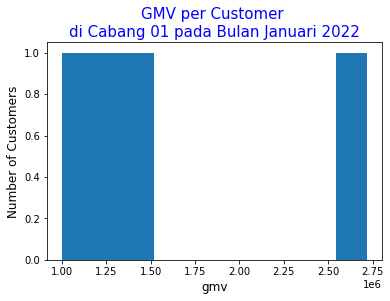

In [213]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['gmv'])
plt.title('GMV per Customer \ndi Cabang 01 pada Bulan Januari 2022', fontsize=15, color='blue')
plt.xlabel('gmv',fontsize= 12)
plt.ylabel('Number of Customers',fontsize= 12)
plt.show()
#customer paling banyak mengeluarkan uang sejumlah 1 juta hingga 2 juta

<Figure size 432x288 with 0 Axes>

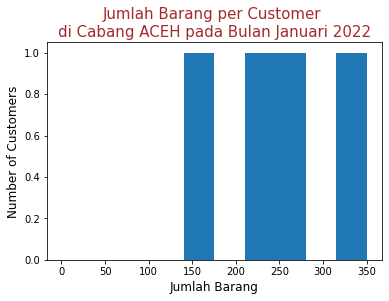

In [217]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['jumlah_barang'],range=(1,350))
plt.title('Jumlah Barang per Customer \ndi Cabang ACEH pada Bulan Januari 2022', fontsize=15, color='brown')
plt.xlabel('Jumlah Barang',fontsize= 12)
plt.ylabel('Number of Customers',fontsize= 12)
plt.show()
#customer paling banyak membeli diantara 0-15 barang

In [219]:
data_per_customer.sort_values(by='gmv',ascending=False)

,customer_nama,orders,jumlah_barang,gmv
1,APOTEK SINAR JAYA,14,345,2717040
2,APOTEK TAPAK,11,218,1477043
0,APOTEK MAJA,11,165,1216970
3,KLINIK SAHABAT,12,272,1003338
